In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

In [13]:
df = pd.read_csv("per_game_stats_nba.csv")


In [28]:
df.rename(columns = 
          {'WIN%' : 'WIN_PERCENT', 'FG%': 'FG_PERCENT', '3P%': '3P_PERCENT', 'FT%': 'FT_PERCENT'}
          , inplace=True)
df.rename(columns = {'+/-' : 'PLUS_MINUS'}, inplace=True)
df.head()

,SEASON,TEAM,GP,W,L,WIN_PERCENT,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PLUS_MINUS
0,1996-97,Bulls,82,69,13,0.841,48.1,103.1,40.0,84.4,...,30.0,45.1,26.1,13.5,8.7,4.0,3.5,19.7,0.2,10.8
1,1996-97,Jazz,82,64,18,0.780,48.4,103.1,38.2,75.8,...,29.4,40.2,26.8,15.4,9.1,5.1,4.5,24.1,0.2,8.8
2,1996-97,Heat,82,61,21,0.744,48.3,94.8,34.4,76.0,...,29.3,41.0,21.2,15.9,7.9,5.4,4.8,23.4,0.3,5.5
3,1996-97,Rockets,82,57,25,0.695,48.4,100.6,37.0,79.1,...,31.3,42.6,24.5,16.6,8.4,4.2,4.5,19.6,0.2,4.5
4,1996-97,Knicks,82,57,25,0.695,48.4,95.4,35.1,75.9,...,30.7,42.5,22.1,17.8,7.7,4.6,3.6,24.8,0.2,3.1


In [30]:
df.columns

Index(['SEASON', 'TEAM', 'GP', 'W', 'L', 'WIN_PERCENT', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG_PERCENT', '3PM', '3PA', '3P_PERCENT', 'FTM', 'FTA',
       'FT_PERCENT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PLUS_MINUS'],
      dtype='object')

In [33]:
'3PM', '3PA'
df.rename(columns = 
          {'3PM' : 'THREE_PM', '3PA' : 'THREE_PA', '3P_PERCENT' : 'THREE_P_PERCENT'}
          , inplace=True)
df.rename(columns = {'+/-' : 'PLUS_MINUS'}, inplace=True)

In [34]:
df.columns

Index(['SEASON', 'TEAM', 'GP', 'W', 'L', 'WIN_PERCENT', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG_PERCENT', 'THREE_PM', 'THREE_PA', 'THREE_P_PERCENT', 'FTM',
       'FTA', 'FT_PERCENT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PLUS_MINUS'],
      dtype='object')

In [35]:
df.shape

(653, 28)

In [36]:
df.describe()

,GP,W,L,WIN_PERCENT,MIN,PTS,FGM,FGA,FG_PERCENT,THREE_PM,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PLUS_MINUS
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.00000,653.000000,...,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,81.261868,40.630934,40.630934,0.500003,48.356355,99.255590,37.094181,81.980398,45.25023,6.760490,...,30.997090,42.342879,21.884380,14.608882,7.668913,4.922665,4.923737,21.223124,13.451608,0.001225
std,3.352094,12.676609,12.677697,0.154525,0.177949,5.814462,2.077405,3.507317,1.58620,2.315823,...,2.112403,1.969662,1.993363,1.205183,0.898566,0.837122,0.715861,1.767915,9.828759,4.589973
min,66.000000,7.000000,9.000000,0.106000,48.000000,84.200000,31.300000,72.800000,40.80000,2.300000,...,24.900000,36.900000,17.400000,11.200000,5.500000,2.400000,3.000000,16.600000,0.000000,-13.900000
25%,82.000000,32.000000,31.000000,0.390000,48.200000,95.400000,35.700000,79.400000,44.20000,5.100000,...,29.500000,40.900000,20.500000,13.800000,7.100000,4.300000,4.400000,20.000000,0.200000,-3.100000
50%,82.000000,41.000000,40.000000,0.512000,48.400000,98.500000,36.900000,81.700000,45.20000,6.400000,...,30.800000,42.200000,21.700000,14.600000,7.600000,4.900000,4.900000,21.100000,19.500000,0.200000
75%,82.000000,50.000000,49.000000,0.610000,48.500000,102.800000,38.300000,84.300000,46.20000,8.100000,...,32.300000,43.600000,23.200000,15.300000,8.200000,5.400000,5.400000,22.400000,20.900000,3.400000
max,82.000000,73.000000,72.000000,0.890000,49.000000,118.100000,44.000000,94.000000,50.40000,16.100000,...,40.400000,49.700000,30.400000,19.000000,12.000000,8.200000,6.900000,27.100000,25.700000,11.600000


In [37]:
df.columns

Index(['SEASON', 'TEAM', 'GP', 'W', 'L', 'WIN_PERCENT', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG_PERCENT', 'THREE_PM', 'THREE_PA', 'THREE_P_PERCENT', 'FTM',
       'FTA', 'FT_PERCENT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PLUS_MINUS'],
      dtype='object')

In [53]:
# Define the problem
x_cols = ['SEASON', 'TEAM', 'GP', 'W', 'L', 'WIN_PERCENT', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG_PERCENT', 'THREE_PM', 'THREE_PA', 'THREE_P_PERCENT', 'FTM',
       'FTA', 'FT_PERCENT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PLUS_MINUS']
dependent_var = "WIN_PERCENT"
independent_var = ["PTS", "FG%", "THREE_P_PERCENT", "OREB"]
norm_columns = ['WIN_PERCENT', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG_PERCENT', 'THREE_PM', 'THREE_PA', 'THREE_P_PERCENT', 'FTM',
       'FTA', 'FT_PERCENT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PLUS_MINUS']

### Fitting an Initial Model

In [54]:
# Normalizing the data:
for col in norm_columns:
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,SEASON,TEAM,GP,W,L,WIN_PERCENT,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PLUS_MINUS
0,1996-97,Bulls,82,69,13,2.206737,-1.440611,0.661181,1.398774,0.689873,...,-0.472017,1.399794,2.114828,-0.920094,1.147480,-1.102186,-1.988845,-0.861537,-1.348248,2.352688
1,1996-97,Jazz,82,64,18,1.811980,0.245265,0.661181,0.532308,-1.762144,...,-0.756054,-1.087942,2.465993,0.656429,1.592634,0.211839,-0.591926,1.627271,-1.348248,1.916956
2,1996-97,Heat,82,61,21,1.579009,-0.316694,-0.766294,-1.296897,-1.705121,...,-0.803393,-0.681781,-0.343329,1.071304,0.257173,0.570210,-0.172850,1.231324,-1.338074,1.197997
3,1996-97,Rockets,82,57,25,1.261909,0.245265,0.231218,-0.045336,-0.821254,...,0.143396,0.130541,1.312164,1.652129,0.813615,-0.863272,-0.591926,-0.918101,-1.348248,0.980131
4,1996-97,Knicks,82,57,25,1.261909,0.245265,-0.663103,-0.959938,-1.733632,...,-0.140641,0.079771,0.108169,2.647828,0.034597,-0.385445,-1.849153,2.023217,-1.348248,0.675118


In [55]:
correlation = df[x_cols].corr()
correlation

,GP,W,L,WIN_PERCENT,MIN,PTS,FGM,FGA,FG_PERCENT,THREE_PM,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PLUS_MINUS
GP,1.000000,0.131891,0.132529,-0.000182,-0.055633,0.113724,0.065743,0.034943,0.063377,0.033658,...,0.019299,0.016555,0.100530,0.003865,-0.001927,-0.046172,-0.054430,0.205271,-0.137162,-0.000320
W,0.131891,1.000000,-0.965041,0.990405,-0.025849,0.368832,0.307180,-0.093303,0.604157,0.221768,...,0.328375,0.234038,0.383858,-0.354809,0.147279,0.208524,-0.467352,-0.177608,-0.006945,0.962395
L,0.132529,-0.965041,1.000000,-0.990368,0.011137,-0.338731,-0.289770,0.102534,-0.587348,-0.212849,...,-0.323244,-0.229641,-0.357244,0.355801,-0.147776,-0.220714,0.452920,0.231869,-0.029323,-0.962397
WIN_PERCENT,-0.000182,0.990405,-0.990368,1.000000,-0.013978,0.357800,0.302376,-0.098062,0.602235,0.219019,...,0.329951,0.236335,0.373077,-0.356783,0.150084,0.217045,-0.462852,-0.206915,0.011220,0.971994
MIN,-0.055633,-0.025849,0.011137,-0.013978,1.000000,-0.072184,-0.060350,-0.045656,-0.041016,-0.083279,...,-0.028288,-0.028347,-0.055843,0.022335,-0.068448,0.005312,-0.027734,0.049625,0.010708,-0.027876
PTS,0.113724,0.368832,-0.338731,0.357800,-0.072184,1.000000,0.915955,0.693876,0.612056,0.749001,...,0.650153,0.460808,0.550678,-0.235704,0.114780,0.017554,-0.196364,-0.213444,0.460438,0.378531
FGM,0.065743,0.307180,-0.289770,0.302376,-0.060350,0.915955,1.000000,0.780442,0.639692,0.612030,...,0.624860,0.478545,0.637687,-0.268329,0.127972,0.054589,-0.197182,-0.271747,0.409167,0.318485
FGA,0.034943,-0.093303,0.102534,-0.098062,-0.045656,0.693876,0.780442,1.000000,0.019892,0.579888,...,0.570168,0.607218,0.408949,-0.214061,0.140515,-0.024985,0.102091,-0.221211,0.290343,-0.085328
FG_PERCENT,0.063377,0.604157,-0.587348,0.602235,-0.041016,0.612056,0.639692,0.019892,1.000000,0.263719,...,0.294956,0.018053,0.514170,-0.166801,0.034703,0.116623,-0.439117,-0.159818,0.301584,0.612503
THREE_PM,0.033658,0.221768,-0.212849,0.219019,-0.083279,0.749001,0.612030,0.579888,0.263719,1.000000,...,0.650456,0.311738,0.334804,-0.297353,-0.022946,-0.117956,-0.267842,-0.370766,0.491857,0.231292


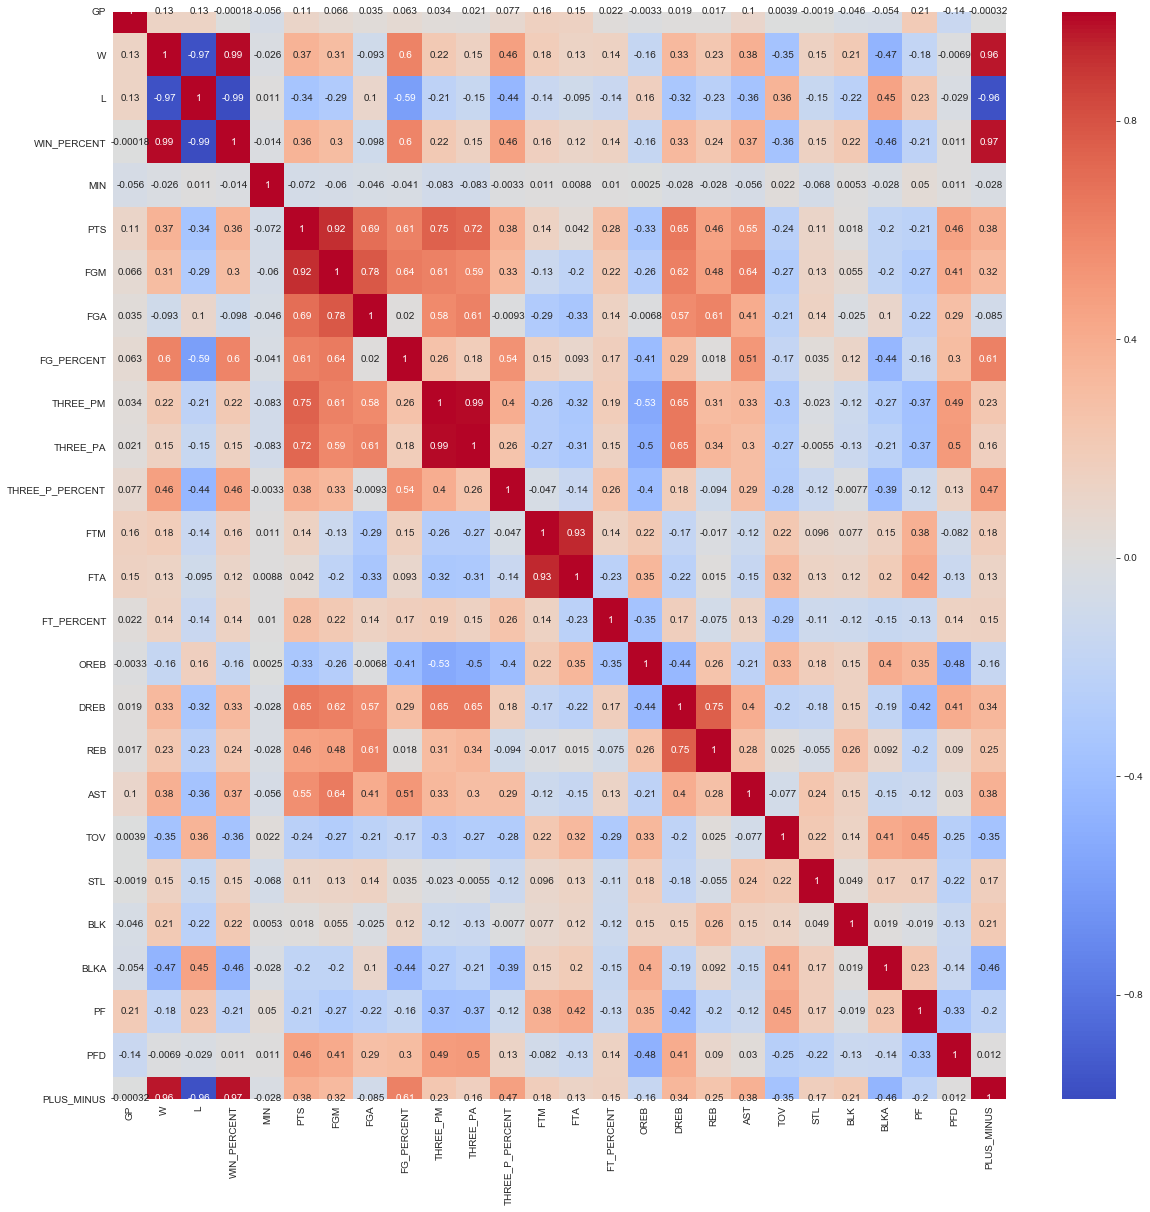

In [56]:
plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot =True, cmap = "coolwarm", linecolor="white")

In [58]:
# building a linear regression model using statsmodel WIN_PERCENT regressed on PTS
model = ols(formula='WIN_PERCENT~PTS', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WIN_PERCENT   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     95.58
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           3.73e-21
Time:                        12:58:55   Log-Likelihood:                -881.34
No. Observations:                 653   AIC:                             1767.
Df Residuals:                     651   BIC:                             1776.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.584e-15      0.037   -9.8e-14      1.000      -0.072       0.072
PTS            0.3578      0.037      9.776      0.000       0.286       0.430
==============================================================================
Omnibus:                       31.305   Durbin-Watson:                   0.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.492
Skew:                          -0.133   Prob(JB):                     0.000713
Kurtosis:                       2.320   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# building a linear regression model using statsmodel WIN_PERCENT regressed on THREE_PA
model_3a = ols(formula='WIN_PERCENT~THREE_PA', data=df).fit()
model_3a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WIN_PERCENT   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     14.82
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           0.000130
Time:                        12:59:03   Log-Likelihood:                -918.72
No. Observations:                 653   AIC:                             1841.
Df Residuals:                     651   BIC:                             1850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.168e-15      0.039   8.18e-14      1.000      -0.076       0.076
THREE_PA       0.1492      0.039      3.849      0.000       0.073       0.225
==============================================================================
Omnibus:                       32.477   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.668
Skew:                          -0.168   Prob(JB):                     0.000396
Kurtosis:                       2.320   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# building a linear regression model using statsmodel WIN_PERCENT regressed on THREE_PM
model_3a = ols(formula='WIN_PERCENT~THREE_PM', data=df).fit()
model_3a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WIN_PERCENT   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     32.80
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.56e-08
Time:                        12:59:09   Log-Likelihood:                -910.02
No. Observations:                 653   AIC:                             1824.
Df Residuals:                     651   BIC:                             1833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.168e-15      0.038   8.29e-14      1.000      -0.075       0.075
THREE_PM       0.2190      0.038      5.727      0.000       0.144       0.294
==============================================================================
Omnibus:                       31.348   Durbin-Watson:                   0.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.194
Skew:                          -0.162   Prob(JB):                     0.000502
Kurtosis:                       2.326   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assessing the Model
Review of P-values

### Refining the Model

### Checking for Multicolinearity
variables with a vif of 5 or greater (or more definitively 10 or greater) are displaying multicollinearity with other variables in the feature set.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# x_cols = ['SEASON', 'TEAM', 'GP', 'W', 'L', 'WIN_PERCENT', 'MIN', 'PTS', 'FGM',
#        'FGA', 'FG_PERCENT', 'THREE_PM', 'THREE_PA', 'THREE_P_PERCENT', 'FTM',
#        'FTA', 'FT_PERCENT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
#        'BLKA', 'PF', 'PFD', 'PLUS_MINUS']
dependent_var = "WIN_PERCENT"
independent_var = ['PTS', 'FGM',
       'FGA', 'FG_PERCENT', 'THREE_PM', 'THREE_PA', 'THREE_P_PERCENT', 'FTM',
       'FTA', 'FT_PERCENT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PLUS_MINUS']

In [62]:
X = df[independent_var]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(independent_var, vif))

[('PTS', 6596.066128154151),
 ('FGM', 3191.3876415856116),
 ('FGA', 648.0883359915838),
 ('FG_PERCENT', 416.08061657701614),
 ('THREE_PM', 1424.2893735492273),
 ('THREE_PA', 364.2995239435767),
 ('THREE_P_PERCENT', 10.468562024997915),
 ('FTM', 1133.2215470450453),
 ('FTA', 505.66587025657924),
 ('FT_PERCENT', 68.97054127847453),
 ('OREB', 886.7459348851891),
 ('DREB', 1910.1010668651327),
 ('REB', 1651.9879900363817),
 ('AST', 2.264680978331579),
 ('TOV', 3.615436920845239),
 ('STL', 2.752627372476696),
 ('BLK', 1.237849780023707),
 ('BLKA', 1.834874620806394),
 ('PF', 1.817207706299963),
 ('PFD', 2.0615656051591413),
 ('PLUS_MINUS', 8.005887768513409)]

### Checking for Normality
 Drawing a Q-Q plot is a helpful to ensure that our residuals are normally distributed.

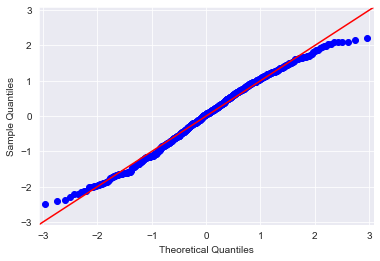

In [63]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity

You should also check that your errors do not display heteroscedasticity; if the errors appear to increase or decrease based on the target variable, then the model does not meet the initial assumptions.

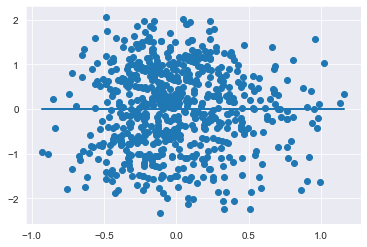

In [64]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

### Additional Model Refinement

### Recheck Normality & Homoscedasticity